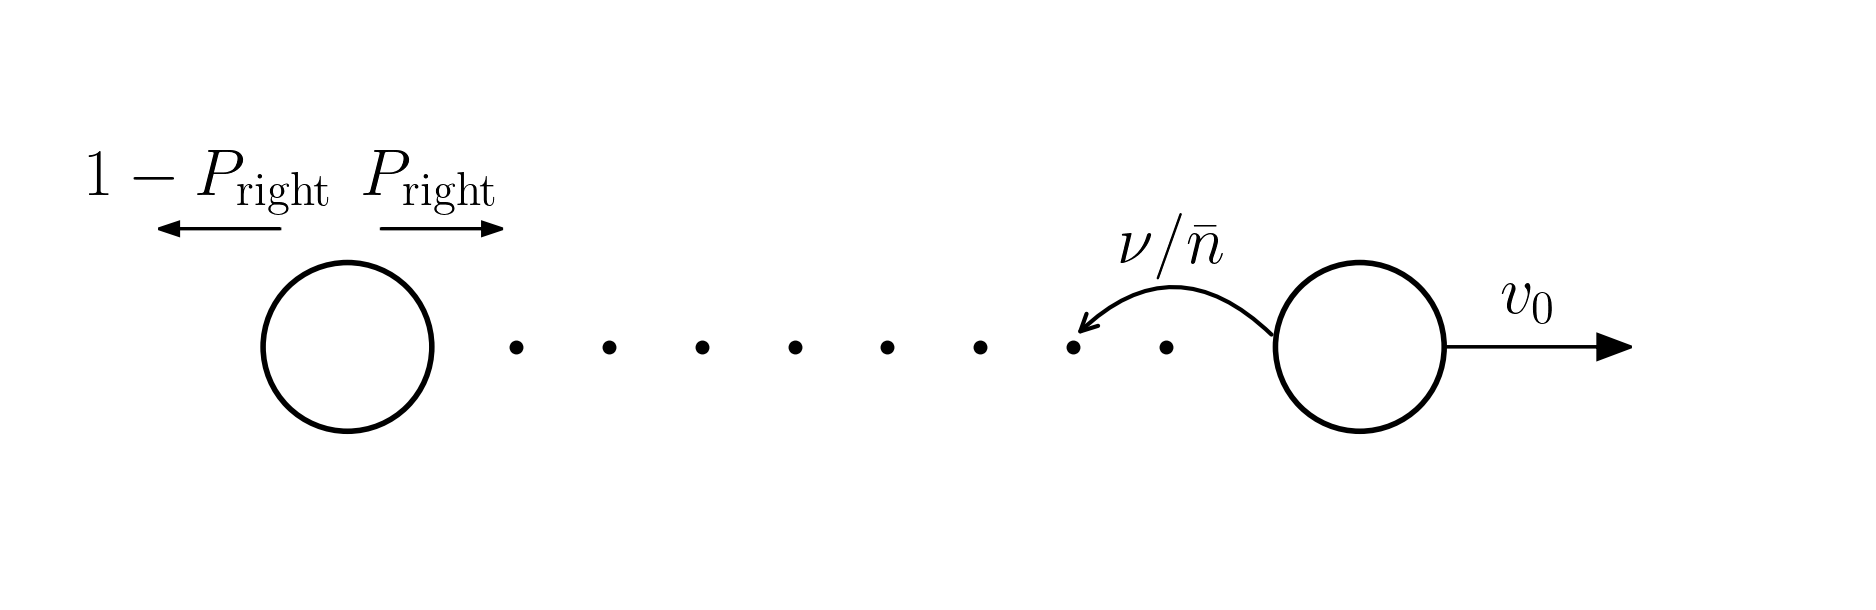

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, FancyArrowPatch
import scienceplots

plt.style.use('science')
plt.rcParams.update({"font.size":24})          # specify font size here

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Set up figure
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_aspect('equal')
ax.axis('off')

# Parameters
radius = 0.5
leader_pos = np.array([8, 5])
follower_pos = np.array([2, 5])

# Draw leader and follower circles
circle_leader = Circle(leader_pos, radius, edgecolor='black', facecolor='none', linewidth=2)
circle_follower = Circle(follower_pos, radius, edgecolor='black', facecolor='none', linewidth=2)
ax.add_patch(circle_leader)
ax.add_patch(circle_follower)

# Arrow for leader motion: v_0
ax.arrow(leader_pos[0] + radius + 0.01, leader_pos[1], 0.9, 0,
         head_width=0.15, head_length=0.2, fc='black', ec='black')
ax.text(leader_pos[0] + radius + 0.5, leader_pos[1] + 0.2, r'$v_0$', ha='center')

# Exosome trail behind leader (ensure no overlap)
exosome_spacing = 0.55
num_exosomes = 8
for i in range(num_exosomes):
    x = leader_pos[0] - radius - 0.1 - exosome_spacing * (i + 1)
    y = leader_pos[1]
    ax.plot(x, y, 'ko', markersize=4)

# Curved arrow using only FancyArrowPatch: ν / n̄
start = (leader_pos[0] - radius, leader_pos[1] + 0.05)
end = (leader_pos[0] - radius - 1.2, leader_pos[1] + 0.05)
arrow = FancyArrowPatch(posA=start, posB=end,
                        arrowstyle='->',
                        connectionstyle='arc3,rad=0.5',
                        mutation_scale=15,
                        linewidth=1.5,
                        color='black')
ax.add_patch(arrow)

# Label above curved arrow
label_x = (start[0] + end[0]) / 2
label_y = (start[1] + end[1]) / 2 + 0.45
ax.text(label_x, label_y, r'$\nu / \bar{n}$', ha='center')

# Follower movement: two short arrows above it
arrow_y = follower_pos[1] + 0.7
arrow_len = 0.6

# Left arrow
ax.arrow(follower_pos[0] - 0.4, arrow_y, -arrow_len, 0,
         head_width=0.08, head_length=0.12, fc='black', ec='black')
ax.text(follower_pos[0] - 0.8, arrow_y + 0.2, r'$1 - P_{\rm right}$', ha='center')

# Right arrow
ax.arrow(follower_pos[0] + 0.2, arrow_y, arrow_len, 0,
         head_width=0.08, head_length=0.12, fc='black', ec='black')
ax.text(follower_pos[0] + 0.5, arrow_y + 0.2, r'$P_{\rm right}$', ha='center')

# Plot limits
ax.set_xlim(0, 11)
ax.set_ylim(3.5, 7.0)

plt.tight_layout()
plt.savefig('../../fig/fig-final/figure3a-sketch.pdf', dpi=300)
plt.show()


/var/folders/lf/pdg5mbv132dgplchv4bmfzd00000gn/T/ipykernel_68735/1371966302.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis_cmap = plt.cm.get_cmap('viridis', 6)


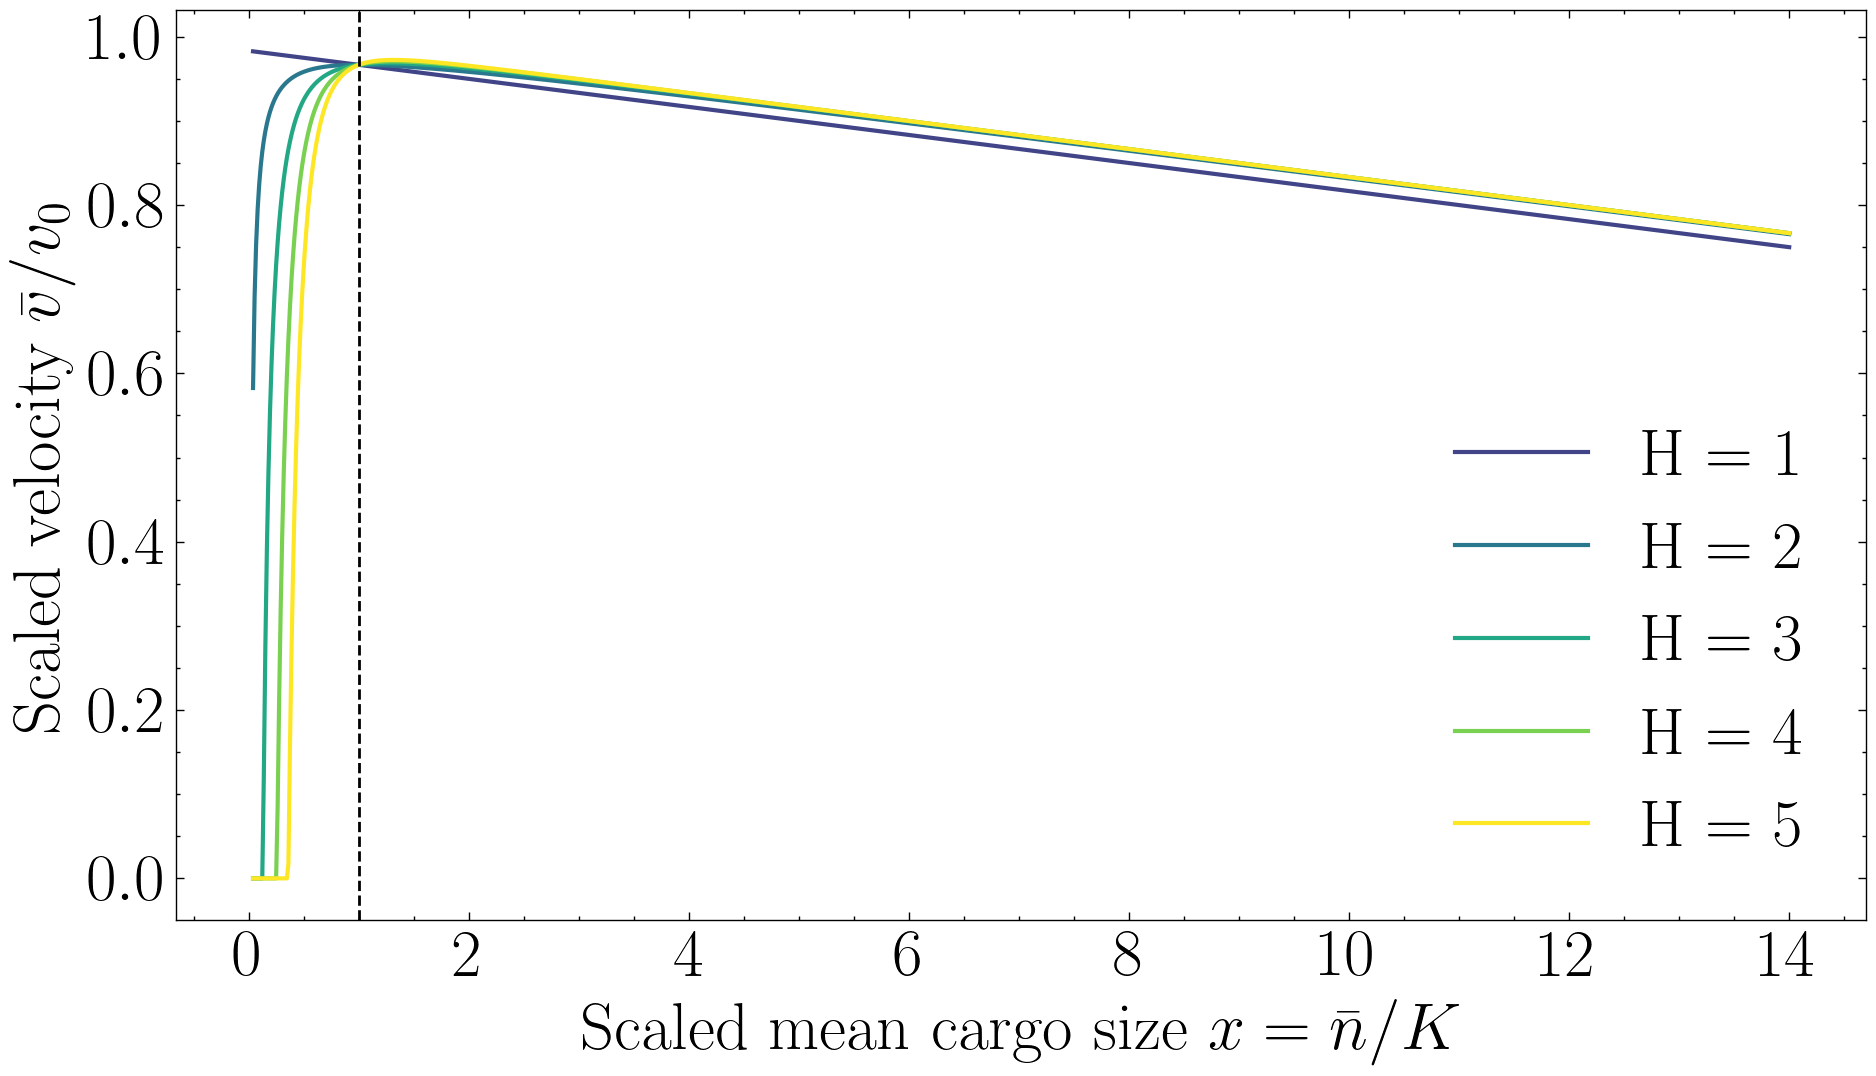

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.style.use('science')
plt.rcParams.update({"font.size":24})          # specify font size here

viridis_cmap = plt.cm.get_cmap('viridis', 6)

# Parameters (match your simulation)
v0 = 3.4 / 60.0  # μm/min
K = 25.0
tau = 5.0  # min
nu = 300.0  # molecules/min
H = [1, 2, 3, 4, 5]

# Compute beta without and with molecule decay
beta = K / (tau * nu)

# Generate n_bar_vals (same as simulation)
n_bar_vals = np.linspace(1.0, 350.0, 1000)
x_vals = n_bar_vals / K

# Define analytic formula
def analytic_formula(x, H, beta_value):
    phi = beta_value * x * (1 + x**(-H))
    v_scaled = 1.0 - phi
    return np.maximum(v_scaled, 0.0)

# Plotting
plt.figure(figsize=(10, 6))

for h in H:
    v_orig = analytic_formula(x_vals, h, beta)
    plt.plot(x_vals, v_orig, '-', lw=1.5, color=viridis_cmap(h), label=f"H = {h}")

plt.xlabel(r"Scaled mean cargo size $x = \bar{n}/K$")
plt.ylabel(r"Scaled velocity $\bar{v}/v_0$")
plt.axvline(1, linestyle = '--', color='black')
plt.legend()
plt.tight_layout()
plt.savefig('../../fig/fig-final/figure3a.pdf', dpi=300)
plt.show()

/var/folders/lf/pdg5mbv132dgplchv4bmfzd00000gn/T/ipykernel_68735/711474150.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("rainbow", len(nu_values))


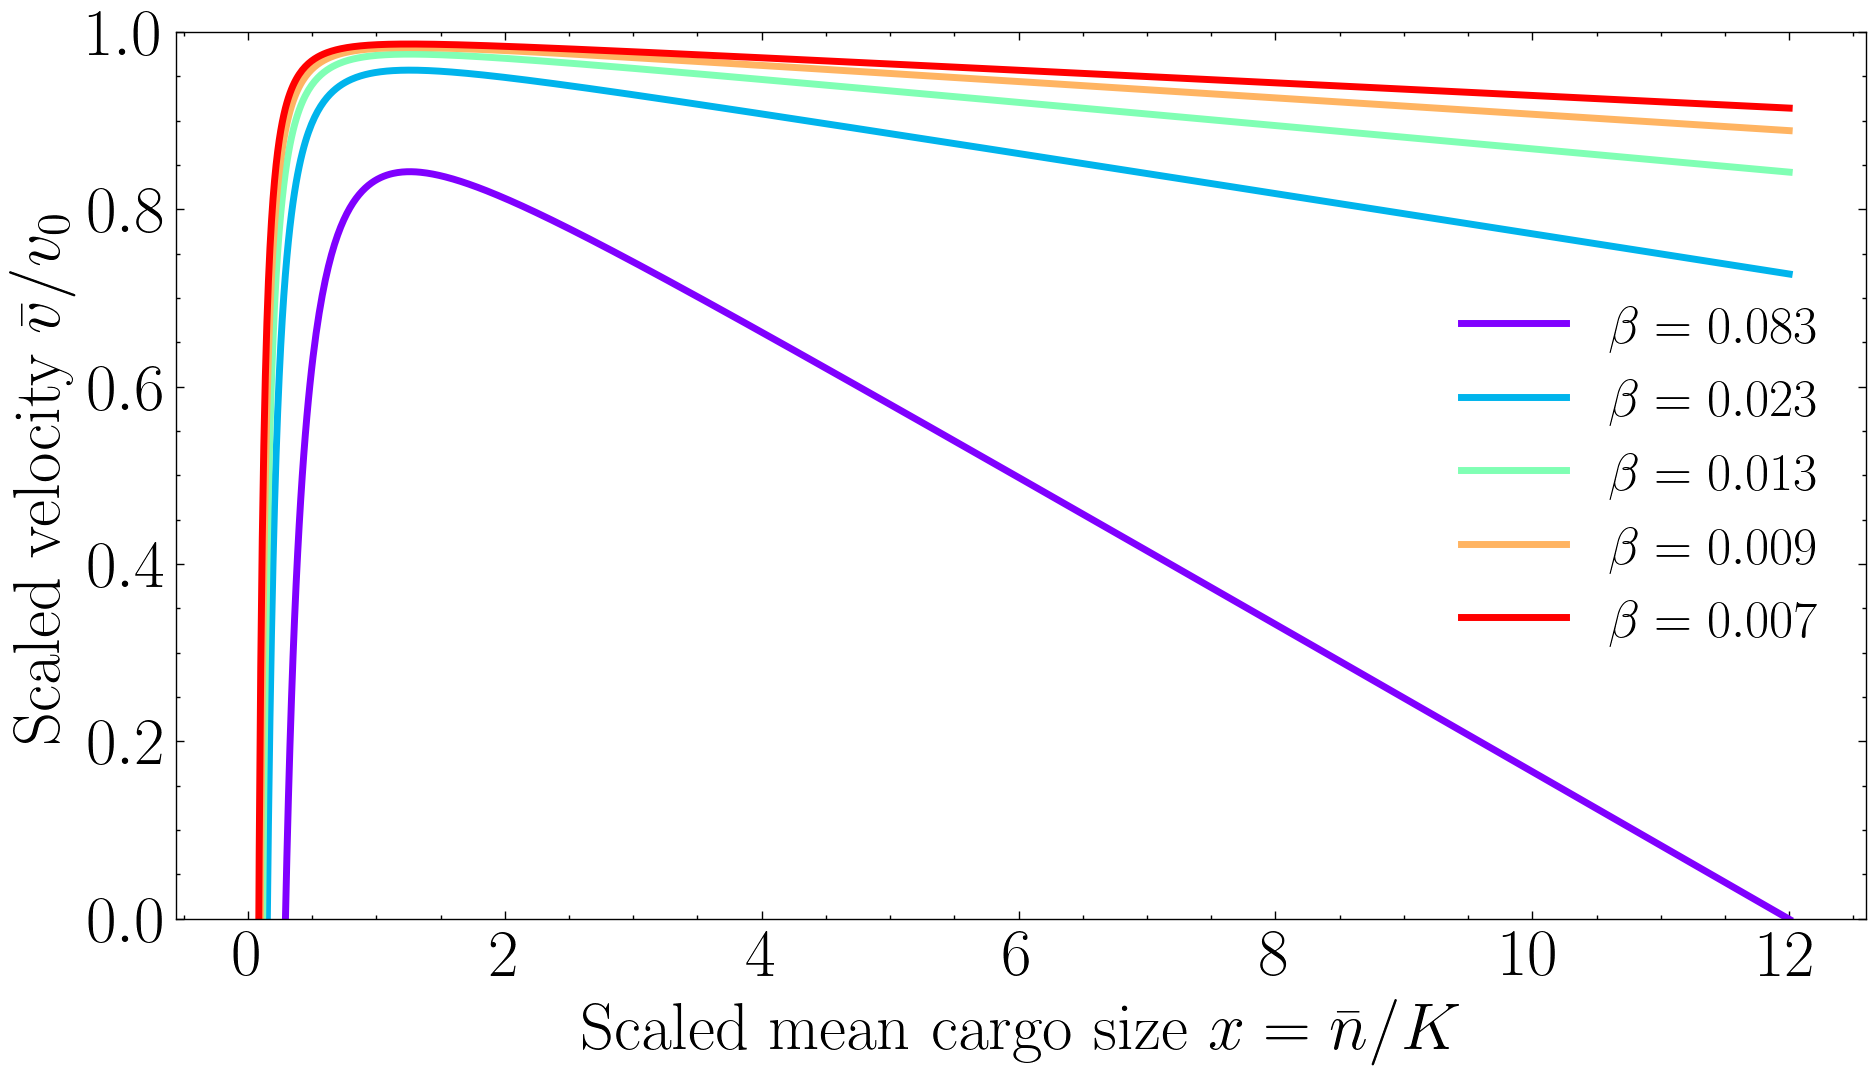

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import matplotlib.cm as cm

plt.style.use('science')
plt.rcParams.update({"font.size": 24})


# =============================================
# PHYSICAL PARAMETERS 
# =============================================
v0 = 3.4 / 60       # µm/min
K  = 25            # threshold molecule count
H  = 3              # Hill coefficient
# nu = 250           # molecules/min
tau = 5.0 # min

nbar = np.linspace(1,300,1000)
# tau_values = [1, 5, 25, 50]  # memory time constants (min)
# nu_values = [60, 100, 250, 500] 
nu_values = np.linspace(60, 700, 5)

# Define the colormap
cmap = cm.get_cmap("rainbow", len(nu_values))
colors = [cmap(i) for i in range(len(nu_values))]

x = nbar / K 

plt.figure(figsize=(10, 6))

def analytic_func(tau, nu, x, K, H):
    beta = K / (nu * tau)
    y = 1 - (beta * x) * (1 + x**(-H))
    return y

for idx,nu in enumerate(nu_values):
    beta = K / (nu * tau)
    plt.plot(nbar/K,analytic_func(tau,nu,x,K,H), label=f"$\\beta = {np.round(beta,3)}$",color=colors[idx],lw = 2.5)
    
plt.legend(fontsize = 19)
plt.ylim(0,1)
plt.xlabel(r'Scaled mean cargo size $x = \bar{n} / K$')
plt.ylabel(r'Scaled velocity $\bar{v} / v_0$')
plt.tight_layout()
plt.savefig("../../fig/fig-final/figure3b.pdf", dpi=300)
plt.show()
